In [2]:
import numpy

def n_dimensional_manhattan_distance(a, b):
    if type(a) == list and type(b) == list:
        print(a, b)
        dist = 0
        print(numpy.array(list(zip(a,b))))
        zippy = zip(a,b)
        print(rec(list(zippy), 0))

                
    return dist

def rec(input, c):
    array_dimensions = []
    rec_dim_helper(input, array_dimensions)
    print(array_dimensions)
    for num, arrd in enumerate(array_dimensions):
        array_dimensions[num] -= 1
    print(array_dimensions, "\n -")
    rec_helper(array_dimensions, array_dimensions)
    print(numpy.array(input))
        
def rec_dim_helper(input, array_dimensions):
    #print(list(input), len(list(input)))
    array_dimensions.append(len(list(input)))
    if type(input[0]) != int:
        if len(input[0]) == 1:
            return input[0]
        else:
            rec_dim_helper(list(input[0]), array_dimensions)
    else:
        #print(input[0])
        pass

def rec_helper(original, current):
    current = [0] * len(original)
    print(current)
        
#n_dimensional_manhattan_distance([[[1,2,3],[2,9,2]],[[9,6,7],[3,4,1]]], [[[3,4,5],[6,4,8]],[[6,4,2],[1,3,4]]])

In [3]:
# 1a
def sum_pairs(arr, goal):
    result = []
    arr.reverse()
    for i1,x1 in enumerate(arr):
        for i2,x2 in enumerate(arr[(i1+1):]):
            #print(x1,x2,' - ',len(arr)-1-i1, len(arr)-2-i2-i1)
            if x1 + x2 == goal:
                result = [x2,x1]
    if len(result) != 0:
        print(result)
        return result
    else:
        print(None)
        return None
sum_pairs([11, 3, 7, 5],        10)
sum_pairs([4, 3, 2, 3, 4],      6)
sum_pairs([0, 0, -2, 3],        2)
sum_pairs([10, 5, 2, 3, 7, 5],  10)

# 1b
def series(n):
    if n == 0:
        return '0.00'
    else:
        result = 0
        for i in range(n):
            result += 1/(1+3*i)
    result = str(round(result*100)/100)
    print(result)
    return result
series(1)
series(2)
series(5)

[3, 7]
[4, 2]
None
[3, 7]
1.0
1.25
1.57


'1.57'

(344, 9)


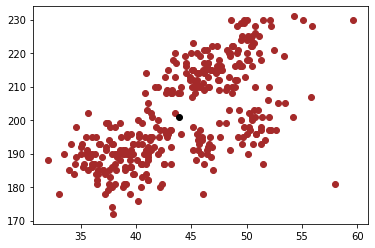

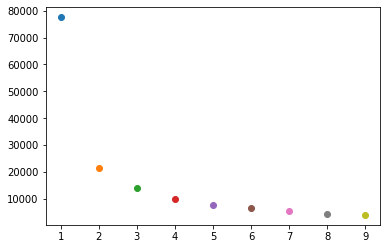

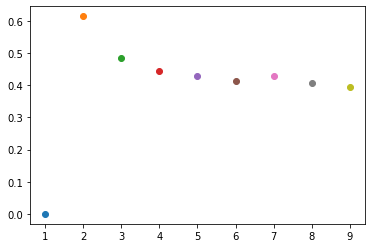

In [43]:
# 2
import pandas
import matplotlib.pyplot as pyplot
import sklearn
from sklearn.cluster import KMeans
from sklearn import metrics

dataframe = pandas.read_csv('penguins.csv')
print(dataframe.shape)

dataframe = dataframe[['bill_length_mm', 'flipper_length_mm']]
dataframe = dataframe.dropna(axis=0)



clf = KMeans(1)
clf.fit(dataframe)

for centroid in clf.cluster_centers_:
    pyplot.plot(centroid[0],centroid[1],"o",c="black")

colors = ["brown","grey","olive","lawngreen","aquamarine","teal","slategrey","royalblue","darkviolet","pink"]

dfv = list(zip(dataframe.values[:,0],dataframe.values[:,1]))
dfv = list(zip(dfv,clf.labels_))

for classification in dfv:
    #print(classification[0][0], classification[0][1], classification[1])
    pyplot.scatter(classification[0][0],classification[0][1],color = colors[classification[1]])
pyplot.show()

inertia = [clf.inertia_]
silhouette = [0]
for i in range(2,10):
    clf = KMeans(i)
    clf.fit(dataframe)
    inertia.append(clf.inertia_)
    silhouette.append(metrics.silhouette_score(dataframe,clf.fit_predict(dataframe)))
for i,x in enumerate(inertia):
    pyplot.scatter(i+1,x)
pyplot.show()
for i,x in enumerate(silhouette):
    pyplot.scatter(i+1,x)
pyplot.show()

#best k = 2

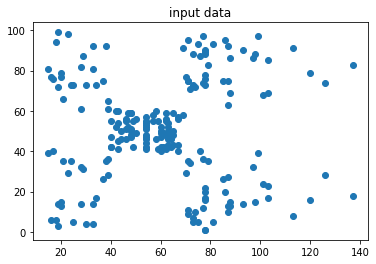

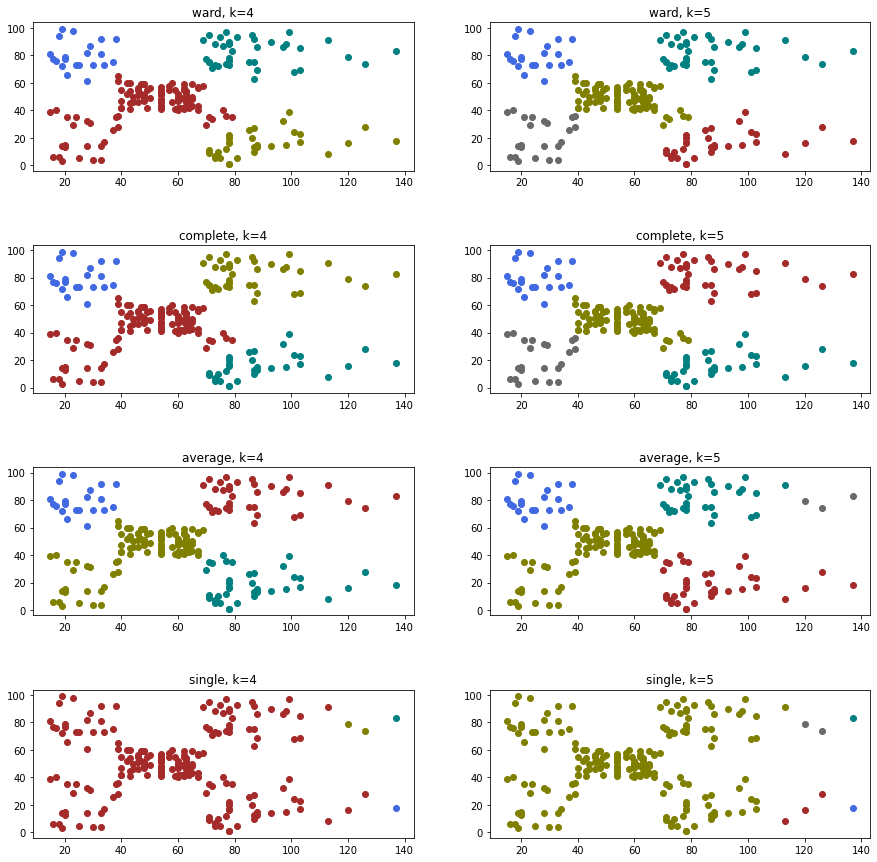

In [101]:
# 3a
import pandas
import numpy
from matplotlib import pyplot
from sklearn.cluster import AgglomerativeClustering, kmeans_plusplus
from scipy.cluster.hierarchy import dendrogram, linkage

X = pandas.read_csv("data.csv").iloc[:,[3,4]].values
#print(X)
pyplot.scatter(X[:,0],X[:,1])
pyplot.title("input data")
pyplot.show()
# b
mallcsv = KMeans(1)
mallcsv.fit(X)
inert = [mallcsv.inertia_]
silh = []
for i in range(2,10):
    mallcsv = KMeans(i)
    mallcsv.fit(X)
    inert.append(mallcsv.inertia_)
    silh.append(metrics.silhouette_score(X,mallcsv.fit_predict(X)))
"""
for i,x in enumerate(inert):
    pyplot.scatter(i+1,x)
pyplot.show()
for i,x in enumerate(silh):
    pyplot.scatter(i+1,x)
pyplot.show()
"""
# best k = 4 but 5 seems more fitting
# c
links = ["ward","complete","average","single"]
fig = pyplot.figure()
fig.set_size_inches(15,15)
plotrun = 0
for link in links:
    aggcls = AgglomerativeClustering(n_clusters=4,linkage=link).fit(X)
    #print(aggcls.fit_predict(X))
    colors4 = ["brown","olive","teal","royalblue","dimgrey"]
    Y = zip(X,aggcls.fit_predict(X))
    pyplot.subplot(4,2,1+plotrun*2)
    str4 = link + ", k=4"
    pyplot.title(str4)
    plotrun += 1
    for point in Y:
        pyplot.scatter(point[0][0],point[0][1],color=colors4[point[1]])
        
plotrun = 0
for link in links:
    aggcls = AgglomerativeClustering(n_clusters=5,linkage=link).fit(X)
    #print(aggcls.fit_predict(X))
    colors4 = ["brown","olive","teal","royalblue","dimgrey"]
    Y = zip(X,aggcls.fit_predict(X))
    pyplot.subplot(4,2,2+plotrun*2)
    str5 = link + ", k=5"
    pyplot.title(str5)
    plotrun += 1
    for point in Y:
        pyplot.scatter(point[0][0],point[0][1],color=colors4[point[1]])
pyplot.subplots_adjust(hspace = 0.5)
pyplot.show()